In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.lines as lns

def plot_function(interval,fun):
    a=interval[0]
    b=interval[1]
    
    x=np.linspace(a-1,b+1,100)
    y1=fun(x)
    
    plt.figure(figsize=(15, 10))
    plt.plot(x,y1,linewidth=5)
    plt.plot(x,np.zeros(x.size),linewidth=5)


def draw_vertical_lines(a,b):
    limits=plt.axis()
    l1=lns.Line2D([a[0],a[0]],[0,a[1]],color="blue",linewidth=5)
    l2=lns.Line2D([b[0],b[0]],[0,b[1]],color="blue",linewidth=5)
    ax = plt.gca()
    ax.add_line(l1)
    ax.add_line(l2)

def draw_trapezoid(a,b):
    limits=plt.axis()
    l1=lns.Line2D([a[0],a[0]],[0,a[1]],color="blue",linewidth=5)
    l2=lns.Line2D([b[0],b[0]],[0,b[1]],color="blue",linewidth=5)
    l3=lns.Line2D([a[0],b[0]],[a[1],b[1]],color="red",linewidth=5)
    ax = plt.gca()
    ax.add_line(l1)
    ax.add_line(l2)
    ax.add_line(l3)

def draw_trapezoids(a,b,fun,n):
    plot_function([a,b],fun)
    x=np.linspace(a,b,n+1);
    for i in range(len(x)-1):
        draw_trapezoid([x[i],fun(x[i])],[x[i+1],fun(x[i+1])])


def draw_simpson(a,b,fun):
    x=np.linspace(a,b,3)
    y=fun(x)
    p=linterp(x,y)
    plot_function([a,b],fun)
    draw_vertical_lines([a,fun(a)],[b,fun(b)])
    c=(a+b)/2
    draw_vertical_lines([c,fun(c)],[c,fun(c)])
    xp=np.linspace(a,b,100)
    plt.plot(xp,np.polyval(p,xp),linewidth=5,color="red")
    plt.plot([a,c,b],[fun(a),fun(c),fun(b)],'o',markersize=15,markerfacecolor='g')

def draw_simpsons(a,b,fun,n):
    plot_function([a,b],fun)
    draw_vertical_lines([a,fun(a)],[b,fun(b)])

    points=np.linspace(a,b,3*n-1)
    I=0
    for i in range(0,len(points)-1,2):
        x=[points[i],points[i+1],points[i+2]]
        y=[fun(points[i]),fun(points[i+1]),fun(points[i+2])]
        p=linterp(x,y)
        xp=np.linspace(points[i],points[i+2],50)
        plt.plot(xp,np.polyval(p,xp),linewidth=5,color="red")
        draw_vertical_lines([points[i],fun(points[i])],[points[i],fun(points[i])])
        draw_vertical_lines([points[i+1],fun(points[i+1])],[points[i+1],fun(points[i+1])])
        draw_vertical_lines([points[i+2],fun(points[i+2])],[points[i+2],fun(points[i+2])])

def calculate_error(a,b,fun,correct_solution,max_num_of_reps,method):
    errors=np.zeros(max_num_of_reps)
    sub_intervals=np.zeros(max_num_of_reps)
    for i in range(max_num_of_reps):
        I=method(a,b,fun,i+1)
        errors[i]=np.abs(I-correct_solution)
        if method == 'trapez_kompozitno':
            sub_intervals[i]=(b-a)/i
        else:
            sub_intervals[i]=(b-a)/(3*i-1)
    
    #plt.figure(figsize=(10, 10))
    #plt.plot(range(1,max_num_of_reps+1),errors,linewidth=5)
    #plt.xlabel('Broj primena metoda')
    #plt.ylabel('Greska')
    
    return [errors,sub_intervals]

# Numerička integracija

#### Pomoću numeričke integracije možemo da odredimo određeni integral proizvoljne funkcije.
#### Određeni integral predstavlja površinu figure ispod date funkcije na zadatom zatvorenom intervalu.
#### Na primer, na sledećoj slici određeni integral
#### $$\int_{2}^{6}2^xdx$$ je površina figure ispod funkcije $f(x)=2^x$ na zatvorenom intervalu [2,6].

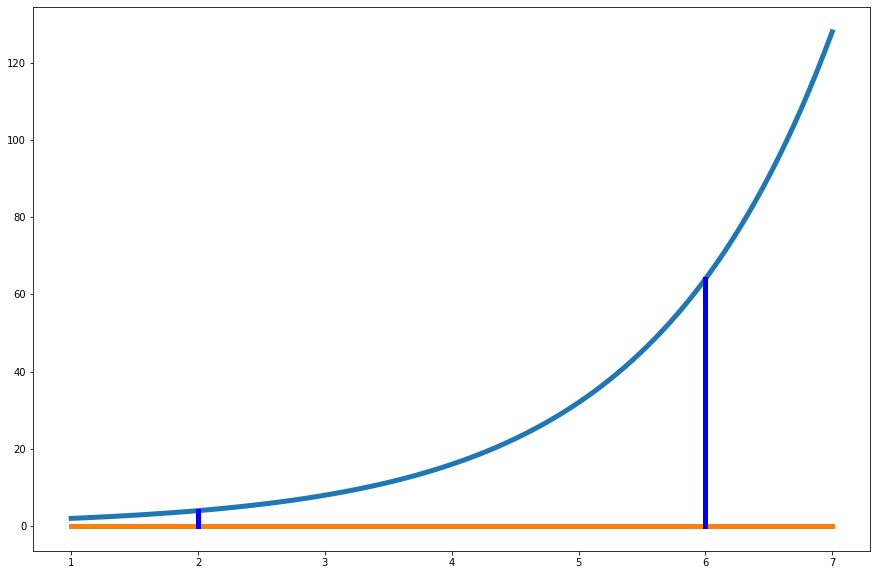

In [2]:
plot_function([2,6],lambda x: 2**x)
draw_vertical_lines([2,2**2],[6,2**6])

#### Sve numeričke metode za integraciju imaju za cilj da procene površinu figure ispod funkcije.
#### Metode se razlikuju po načinu na koji se procena površine vrši.

## Njutn-Kotesove metode

#### Kod Njutn-Kotesovih metoda koristimo interpolaciju da funkciju aproksimiramo polinomom.
#### Nakon toga izračunavamo određeni itegral polinoma.
#### Rezultat intregacije polinoma smatramo rezultatom integracije funkcije. 
#### Pošto je polinom aproksimacija funkcije, rezultat će biti aproksimacija tačne vrednosti određenog integrala funkcije.
#### U nastavku ćemo pokazati na koji način određujemo određeni intregal polinoma i koliko takvom aroksimacijom gubimo na tačnosti.

### Metod trapeza

#### Kod ovog metoda koristimo linearnu interpolaciju da aproksimiramo funkciju.
#### Na taj način dobijamo funkciju aproksimiramo trapezom, kao na sledećoj slici.

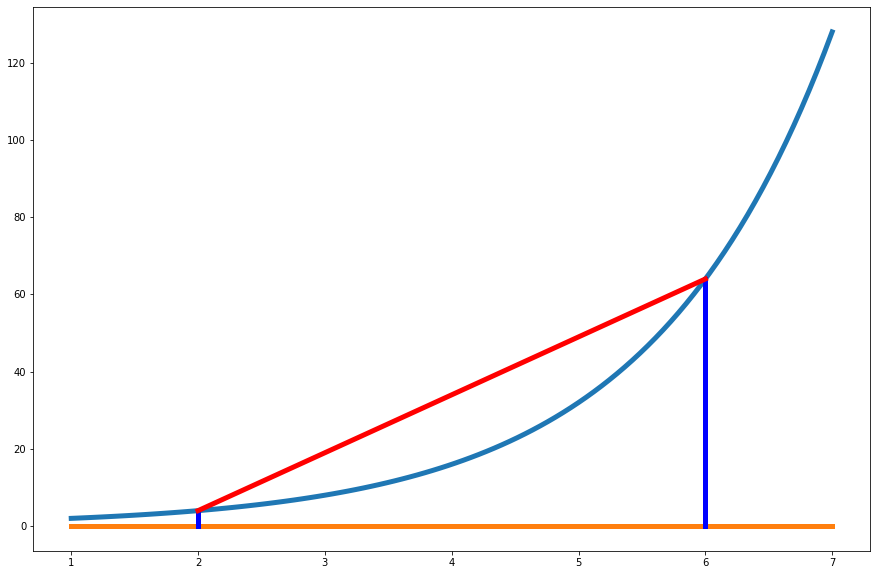

In [3]:
plot_function([2,6],lambda x: 2**x)
draw_vertical_lines([2,2**2],[6,2**6])
draw_trapezoid([2,2**2],[6,2**6])

#### Još uvek nismo rekli na koji način određujemo integral polinoma, u ovom slučaju prave.
#### Određeni integrali polinoma kod Njutn-Kotesovih metoda izračunavamo analitički.
#### Rezultat analitičke integracije biće formula koja će u stvari predstavljati metod trapeza.
#### U nastavku prikazujemo izvođenje formule za metod trapeza.
#### Data nam je proizvoljna funkcija $f(x)$ i interval $[a,b]$. Cilj nam je da izračunamo određeni integral:
#### $$I=\int_{a}^{b}f(x)dx$$
#### Prvo aproksimiramo funkciju $f(x)$ na intervalu $[a,b]$ pomoću prave kroz tačke $(a,f(a))$ i $(a,f(a))$ (kao na slici iznad).
#### Pravu možemo recimo da odredimo pomoću Lagranžovog polinoma:
#### $$p(x)=\frac{x-b}{a-b}f(a)+\frac{x-a}{b-a}f(b)$$
#### Rešavmo sada integral:
#### $$I_p=\int_{a}^{b}p(x)dx$$ 
#### analitički.
#### $$I_p=\int_{a}^{b}p(x)dx=\int_{a}^{b}\frac{x-b}{a-b}f(a)+\int_{a}^{b}\frac{x-a}{b-a}f(b)dx$$
#### $$\int_{a}^{b}(x-b)dx=\int_{a}^{b}xdx-b\int_{a}^{b}dx=\frac{b^2}{2}-\frac{a^2}{2}-b(b-a)=\frac{b^2-a^2-2b^2+2ab}{2}=\frac{-a^2+2ab-b^2}{2}=-\frac{a^2-2ab+b^2}{2}=-\frac{(a-b)^2}{2}$$
#### $$\int_{a}^{b}(x-a)dx=\int_{a}^{b}xdx-a\int_{a}^{b}dx=\frac{b^2}{2}-\frac{a^2}{2}-a(b-a)=\frac{b^2-a^2-2ab+2a^2}{2}=\frac{a^2-2ab+b^2}{2}=\frac{(a-b)^2}{2}$$
#### $$I_p=\int_{a}^{b}p(x)dx=-\frac{f(a)}{a-b}\frac{(a-b)^2}{2}-\frac{f(b)}{a-b}\frac{(a-b)^2}{2}=\frac{(-f(a)-f(b))(a-b)^2}{2(a-b)}=\frac{-(f(a)+f(b))(a-b)}{2}=(b-a)\frac{f(a)+f(b)}{2}$$
#### Dakle, ako koristimo metod trapeza određeni integral funkcije $f(x)$ na zatvorenom intervalu $[a,b]$ aproksimiramo sa:
#### $$I=\int_{a}^{b}f(x)dx\approx(b-a)\frac{f(a)+f(b)}{2}$$
#### Ako se iz geometrije podsetimo da je površina trapeza: srednja linija * visina. Vidimo da smo mi u stvari izveli formulu za površinu trapeza (visina je $b-a$, a srednja linija $\frac{f(a)+f(b)}{2}).$
#### Primer: Primenićemo sada metodu trapeza da rešimo integral:
#### $$I=\int_{2}^{6}2^xdx$$
#### Imamo da je $a=2$,$b=6$,$f(x)=2^x$. Primenjujemo metod:
#### $$I\approx(b-a)\frac{f(a)+f(b)}{2}=(6-2)\frac{f(2)+f(6)}{2}=2(2^2+2^6)=136$$
#### Proverićemo sada koliko smo pogrešili. Analitičko rešenje je:
#### $$I=\int_{2}^{6}2^xdx=\frac{2^x}{ln(2)}\Biggr|_{2}^{6}=86.56170$$
#### U naredne dve linije koda računamo grešku i relativnu grešku.

In [4]:
greska=135-86.5
relativna_greska=(135-86.5)/86.5

print(greska)
print(relativna_greska)

48.5
0.5606936416184971


#### Vidimo da smo pogrešili za 56% što je dosta velika greška. Razlog za to je očigledan ako pogledamo sliku iznad.
#### Između površine trapeza i figure ispod funkcije postoji dosta velika razlika.
#### Dakle, osim ako ne tražimo integral prave, metod trapeza rezultovaće greškom.
#### Pre nego što pokažemo kako ćemo poboljšati tačnost metoda trapeza, napisaćemo kod za metod.

In [5]:
def trapez(a,b,funkcija):
    return (b-a)/2*(funkcija(a)+funkcija(b))

In [6]:
I = trapez(2,6,lambda x: 2**x)

print(I)

136.0


#### Hajde da vidimo šta bi dobili ako umesto jednog trapeza koristmo dva trapeza.

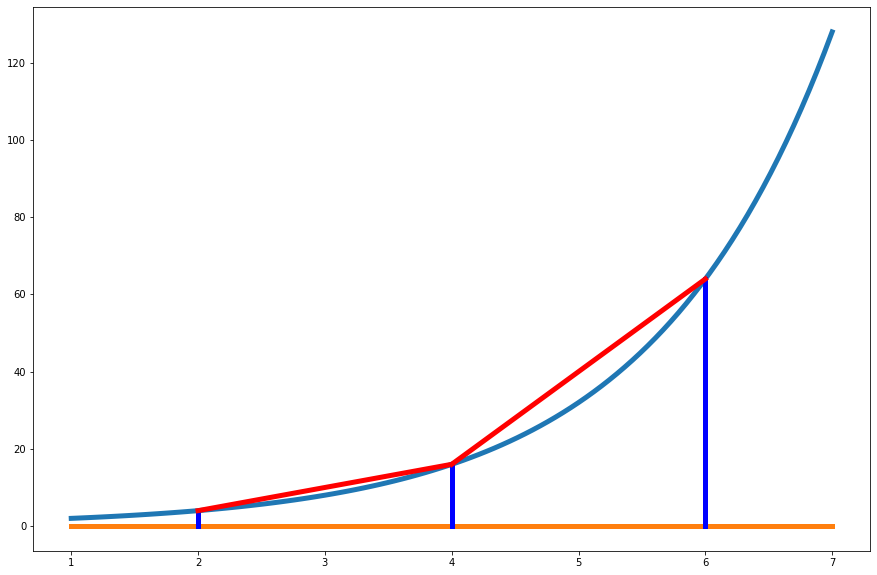

In [7]:
draw_trapezoids(2,6,lambda x: 2**x,2)

In [8]:
I = trapez(2,4,lambda x: 2**x) + trapez(4,6,lambda x: 2**x)

print(I)

100.0


#### Hajde da probamo sa četiri trapeza.

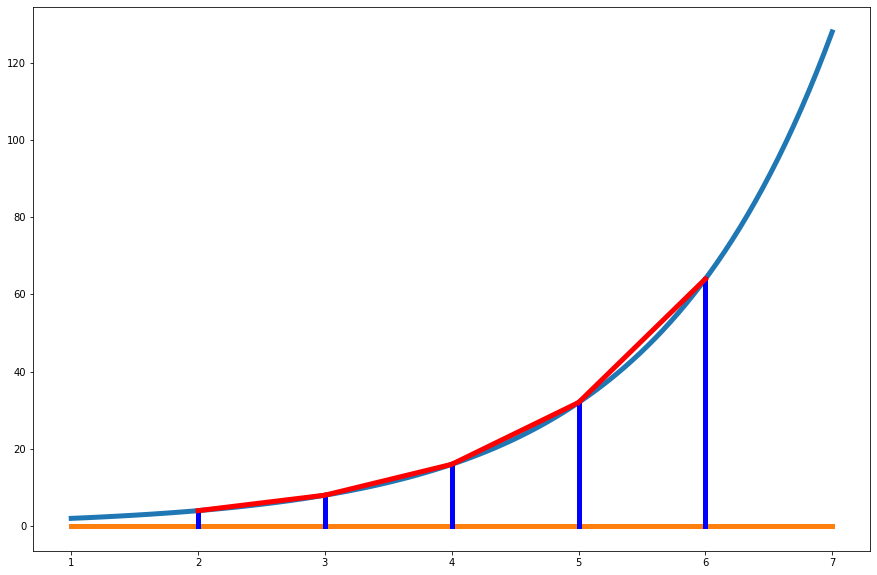

In [9]:
draw_trapezoids(2,6,lambda x: 2**x,4)

In [10]:
points=np.linspace(2,6,5)
I=0
for i in range(1,len(points)-1):
    I=I+trapez(points[i],points[i+1],lambda x: 2**x)

print(I)

84.0


#### Vidimo da kako povećavamo broj trapeza, tako se približavamo sve više tačnom rešenju.
#### Ako pogledamo slike sa 2 i 4 trapeza vidimo da trapezi manje veličine bolje aproksimiraju funkciju i da zbir površina manjih trapeza mnogo bolje aproksimira površinu figure ispod funkcije nego jedan trapez.

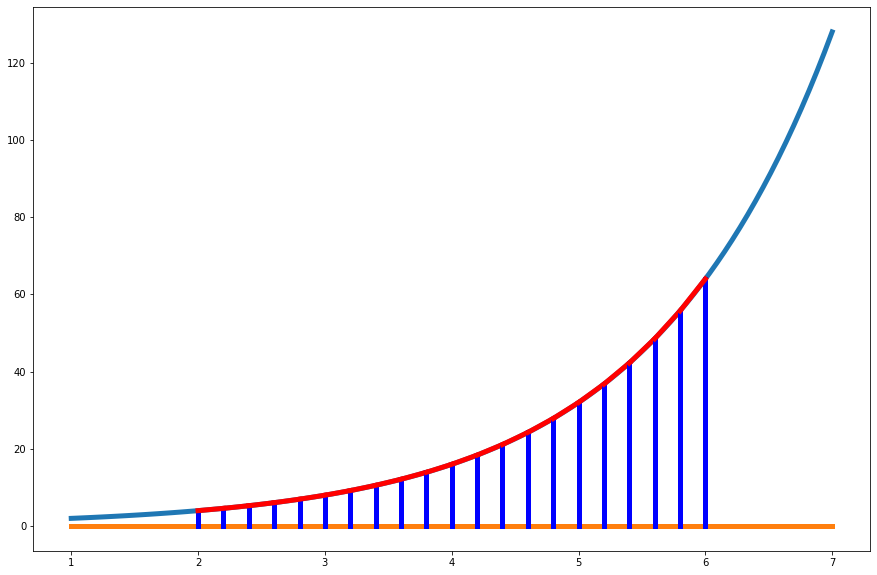

In [11]:
#plot_function([2,6],lambda x: 2**x)
#draw_vertical_lines([2,2**2],[6,2**6])
draw_trapezoids(2,6,lambda x: 2**x,20)

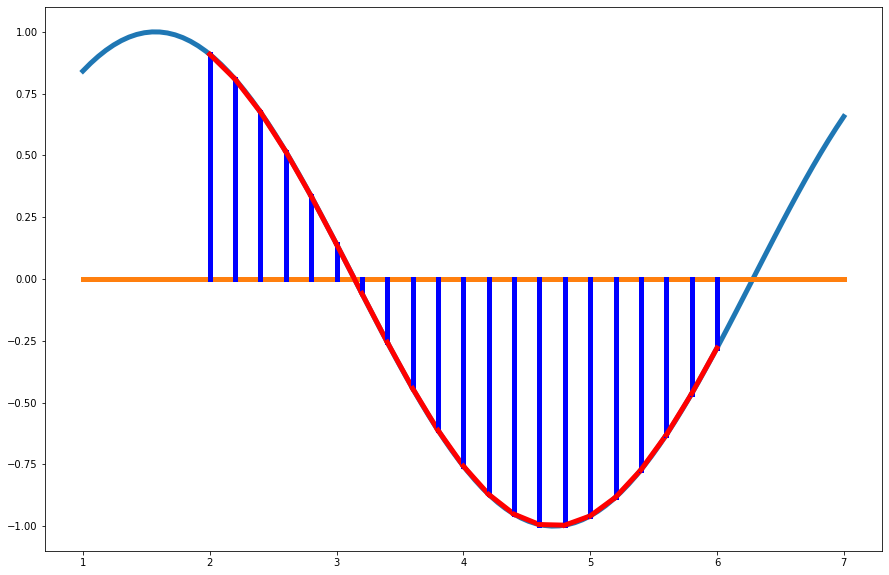

In [12]:
draw_trapezoids(2,6,lambda x: np.sin(x),20)

### Kompozitna metoda trapeza
#### Formalan naziv za postupak koji smo primenili je kompozitna metoda trapeza jer smo površinu figure "složili" iz više delova.
#### Napisaćemo sada kod za kompozitnu metodu trapeza.
#### Ulazni parametar $n$ predstavlja broj trapeza koji želimo.

In [13]:
def trapez_kompozitno(a,b,funkcija,n):
    points=np.linspace(a,b,n+1)
    I=0
    for i in range(len(points)-1):
        I=I+trapez(points[i],points[i+1],funkcija)
    return I

In [14]:
I = trapez_kompozitno(2,6,lambda x: 2**x,2)

print(I)

100.0


### Red greške metode trapeza

#### U literaturi greška metode trapeza tipično se opisuje preko vrednosti $h$ koja predstavlja dužinu jednog pod-intervala na koje delimo interval $[a,b]$ da bi dobili određeni broj trapeza:
#### $$h=\frac{b-a}{n}$$
#### gde je $n$ broj trapeza. Greška metode trapeza označava sa:
#### $$O(h^2)$$
#### i kaže se da je greška metode trapeza reda $h^2$. (Kompletan postupak za određivanje greške metode trapeza dat je u udžbeniku.)
#### To znači da se za male vrednosti $h$, tj. veliki broj trapeza, greška ponaša kao funkcija $f(h)=h^2$.
#### Funkcija koju pozivamo u sledećem redu prikazuje grešku za broj primena metoda redom od $1$ do $2^7$ za $I=\int_{2}^{6}2^xdx$.

Text(0, 0.5, 'Greska')

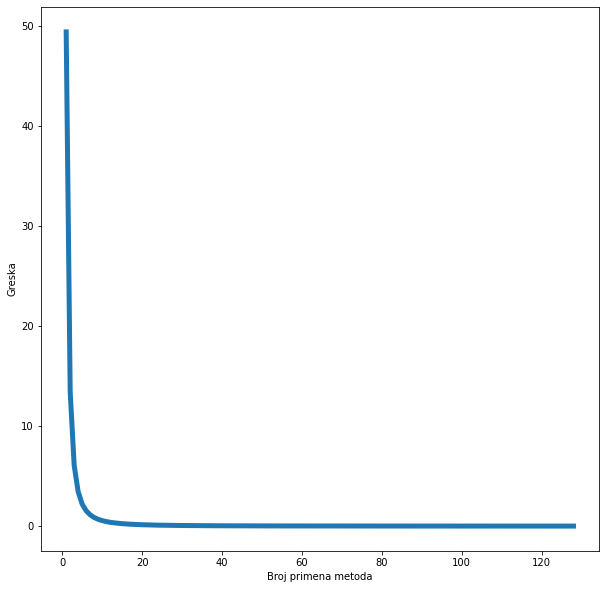

In [15]:
[errors,sub_intervals]=calculate_error(2,6,lambda x: 2**x,86.56170,2**7,trapez_kompozitno)
plt.figure(figsize=(10, 10))
plt.plot(range(1,2**7+1),errors,linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('Greska')

#### Prethodni grafik nije baš pregledan jer greška na početku ima velike vrednosti, a kasnije jako male, pa prelazimo na logaritamsku skalu (prikazujemo log10 od greške).

([<matplotlib.axis.XTick at 0x20bec841358>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

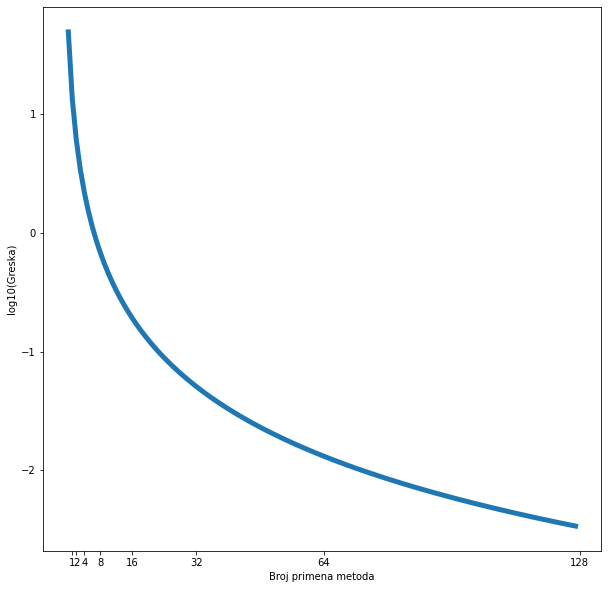

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(errors)),np.log10(errors),linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('log10(Greska)')

plt.xticks([2**i for i in range(8)])

#### Uporedićemo sada grafik greške (označeno plavom) sa fukcijom $f(h)=h^2$ gde je $h$ dužina pod-intervala (označeno crvenom)

Text(0, 0.5, 'log10(Greska)')

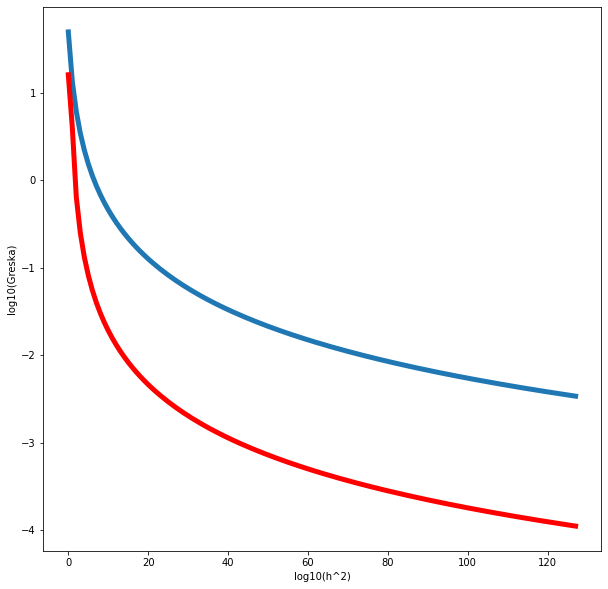

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(errors)),np.log10(errors),linewidth=5)

plt.plot(range(len(sub_intervals)),np.log10(sub_intervals**2),linewidth=5,color="red")
plt.xlabel('log10(h^2)')
plt.ylabel('log10(Greska)')

#### Vidimo da postoji jako veliko podudaranje grafika, iz čega se može zaključiti da odnos između greške i kvadrata veličine pod-intervala stoji.
#### Poznavanje reda greške metoda trapeza omogućava nam da uradimo sledeću procenu:
#### $$greška(h)=h^2\\greška(\frac{h}{2})=(\frac{h}{2})^2=(\frac{1}{2})^2h^2=\frac{1}{4}h^2=\frac{1}{4}greška(h)\\greška(\frac{h}{2})=\frac{1}{4}greška(h)$$
#### To znači da ako prepolovimo veličinu pod-intervala, tj. dupliramo broj primena metoda trapeza, greška se smanji 4 puta.

In [18]:
print([errors[0],errors[1],errors[3]])
print([errors[0],errors[0]/4,errors[0]/16])
print([errors[0],errors[0]/4,errors[1]/4])

[49.4383, 13.438299999999998, 3.438299999999998]
[49.4383, 12.359575, 3.08989375]
[49.4383, 12.359575, 3.3595749999999995]


### Simpsonov 1/3 metod
#### Takođe Njutn-Kotesov metod.
#### U ovom slučaju funkciju aproksimiramo polinomom drugog stepana na intervalu $[a,b]$.
#### Pošto koristimo polinom drugog stepena, treba nam tri tačke. Za treću tačku uzimamo sredinu intervala:
### $$c=\frac{a+b}{2}$$
#### U nastavku koristimo Lagranžovu interpolaciju sa prošlog predavanja da aproksimiramo funkciju $2^x$ na intervalu $[2,6]$. Aproksimaciju radimo u tačkama 2, 4, 6.

In [19]:
def linterp(x,y):
    n = len(x)
    p = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L = np.convolve(np.array([1, -x[j]])/(x[i]-x[j]), L)
        p = p + y[i]*L
    return p

In [20]:
a=2
b=6
x=np.linspace(a,b,3)
fun=lambda x: 2**x
y=fun(x)
p=linterp(x,y)

print(p)

[  4.5 -21.   28. ]


#### Dobili smo interpolacioni polinom, koji onda prikazujemo na sledećem grafiku. Označen je crvenom bojom.

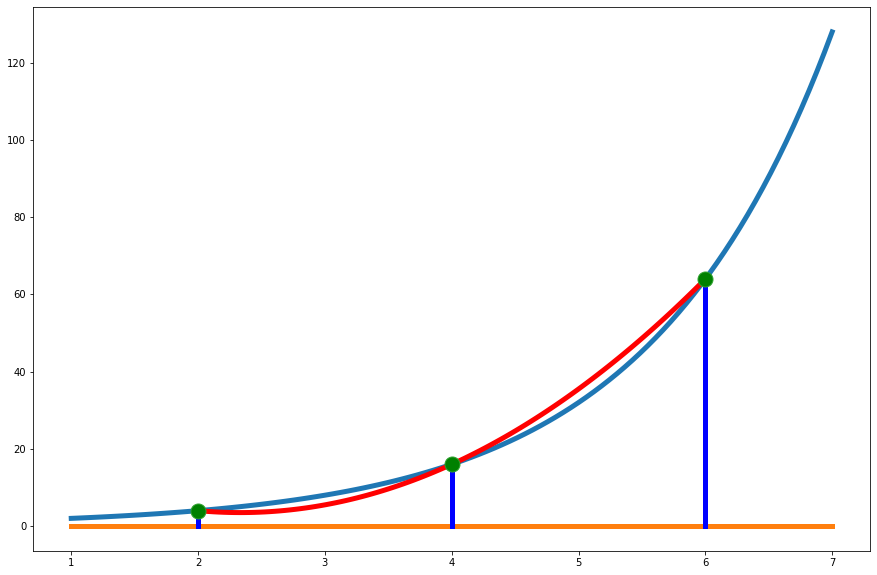

In [21]:
draw_simpson(2,6,lambda x: 2**x)

#### Vidimo da je polinom dosta sličan funkciji na intervalu [2,6]. Nakon što objasnimo metod, proverićemo kolika je greška baš na ovom primeru.
#### Metod ilustrujemo i na primeru funkcije $f(x)=x-cos(2x)$ kako bi pokazali da upotreba kvaradnog polinoma umesto prave jeste bolja, ali da greška još uvek postoji.

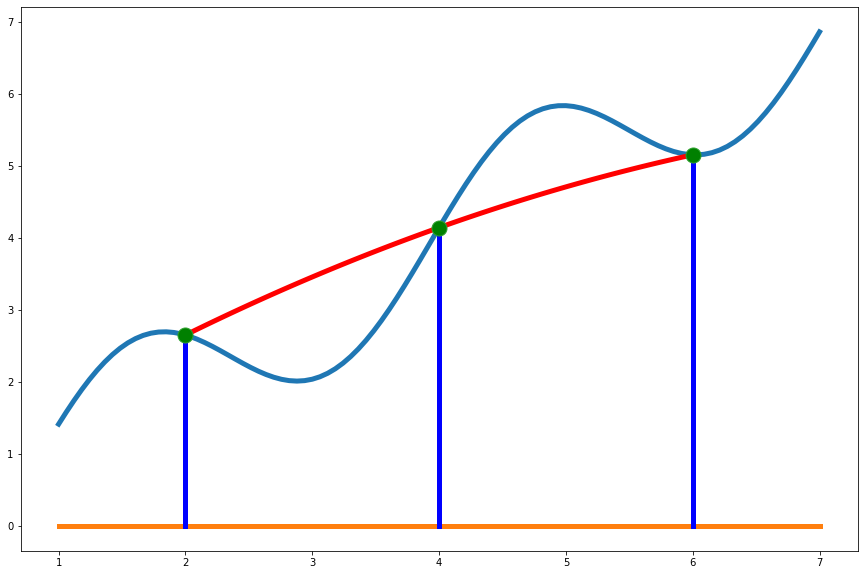

In [22]:
draw_simpson(2,6,lambda x:x-np.cos(2*x))

#### Pokazaćemo sada formulu za Simpsonov 1/3 metod.
#### Rešavamo analitički integral kvadragnog interpolaciono polinoma na intervalu $[a,b]$
#### $$I=\int_{a}^{b}f(x)dx$$
#### $$c=\frac{a+b}{2}$$
#### $$p(x)=\frac{(x-b)(x-c)}{(a-b)(a-c)}f(a)+\frac{(x-a)(x-c)}{(b-a)(b-c)}f(b)+\frac{(x-b)(x-a)}{(c-b)(c-a)}f(c)$$
#### Rešavmo sada integral:
#### $$I_p=\int_{a}^{b}p(x)dx$$ analitički.
#### Postupak rešavanja dat je u udžbeniku, dok ovde samo dajemo rezultat, tj. formulu za Simpsonovu 1/3 metodu:
#### $$I=\int_{a}^{b}f(x)dx\approx\frac{b-a}{6}(f(a)+4f(c)+f(b))\\c=\frac{a+b}{2}$$

#### U nastavku je prikazan kod za Simpsonovu 1/3 metodu.

In [23]:
def simpson(a,b,funkcija):
    c=(a+b)/2
    I=(b-a)/6*(funkcija(a)+4*funkcija(c)+funkcija(b))
    return I

#### Poredimo sada Simpsonovu 1/3 metodu sa metodom trapeza na primerima funkcija $f(x)=2^x$ i $f(x)=x-cos(2x)$

In [24]:
I_trapez = trapez(2,6,lambda x: 2**x)
I_simpson = simpson(2,6,lambda x: 2**x)

print(I_trapez)
print(I_simpson)

136.0
88.0


In [25]:
tacno_resenje = 86.56170

print(tacno_resenje)

86.5617


In [26]:
print(np.abs(tacno_resenje-I_simpson)/tacno_resenje)
print(np.abs(tacno_resenje-I_trapez)/tacno_resenje)

0.016615893634251616
0.5711336537983889


In [27]:
I_trapez = trapez(2,6,lambda x:x-np.cos(2*x))
I_simpson = simpson(2,6,lambda x:x-np.cos(2*x))

print(I_trapez)
print(I_simpson)

15.61957932426224
16.261193198243717


In [28]:
tacno_resenje = 15.88988521134625

print(tacno_resenje)

15.88988521134625


In [29]:
print(np.abs(tacno_resenje-I_simpson)/tacno_resenje)
print(np.abs(tacno_resenje-I_trapez)/tacno_resenje)

0.02336756886275883
0.017011191930511683


#### Vidimo da za prvi primer postoji velika razlika između grešaka u korist Simpsonove 1/3 metode, dok je za drugi primer razlika manja i u korist metode trapeza. Razlike su takve jer imamo samo jednu primenu funkcije, a sam oblik funkcije tada ima veliki značaj. Na primer, funkcija $f(x)=2^x$ veoma liči na kvadratni polinom na intervalu [2,6].
#### Simpsonov metod koristi finiju interpolaciju od metoda trapeza i ima bolju tačnost, što ćemo i demonstrirati poređenjem kompozitnih metoda.
#### Prvo pišemo kod za Simpsonov 1/3 metod. Za $n$ primena metoda, na intervalu $[a,b]$ formiramo ukupno $n+1$ ekvidistantnih tačaka (tu računamo i krajnje tačke) i onda uzimamo po tri tačke i primenjujemo metod na njih.
#### Na primer, za $[2,6]$ i $n=2$ tri tačke su: $2, 4, 6$. Metod primenimo onda na $[2,4]$ i $[4,6]$ i to saberemo. Sama primena metoda na npr. $[2,4]$ kreiraće srednju tačku $3$ i primeniti formulu.

In [30]:
def simpson_kompozitno(a,b,funkcija,n):
    parts=np.linspace(a,b,n+1)
    I=0
    for i in range(len(parts)-1):
        I = I + simpson(parts[i], parts[i+1], funkcija)
    
    return I

In [31]:
I_simpson_kom = simpson_kompozitno(2,6,lambda x: 2**x,2)
I_trapez_kom = trapez_kompozitno(2,6,lambda x: 2**x,2)

print(I_simpson_kom)
print(I_trapez_kom)

86.66666666666666
100.0


In [32]:
tacno_resenje = 86.56170
print(tacno_resenje)

print(np.abs(tacno_resenje-I_simpson_kom)/tacno_resenje)
print(np.abs(tacno_resenje-I_trapez_kom)/tacno_resenje)

86.5617
0.0012126225185810275
0.15524533367528592


#### Vidimo da samo dve primene Simpsonovog metoda rezultuju greškom od 0.1% za primer $f(x)=2^x$.
#### Sa sledećeg grafika može se videti poklapanje $f(x)=2^x$ i dve primene Simpsonovog 1/3 metoda.

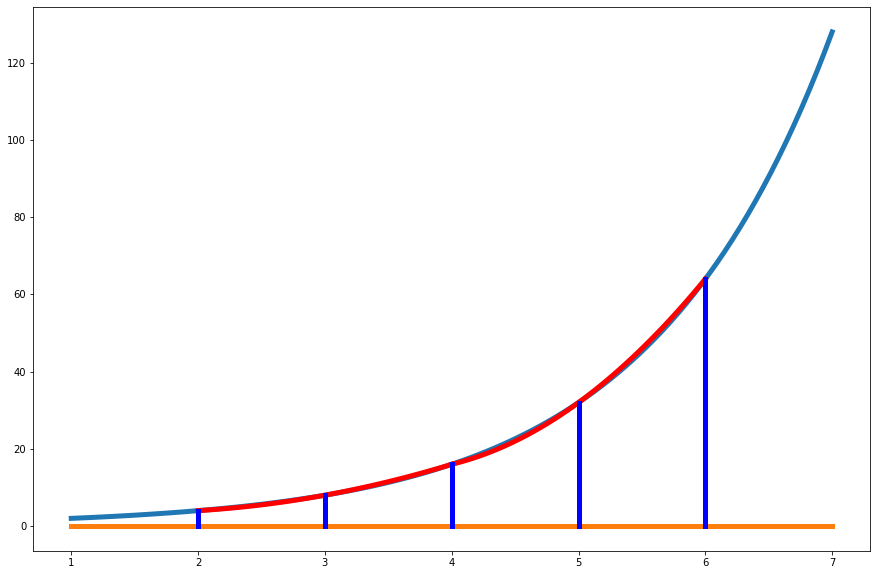

In [33]:
draw_simpsons(2,6,lambda x: 2**x,2)

#### Poredimo sada kompozitne metode na primeru $f(x)=x-cos(2x)$

In [34]:
I_simpson_kom = simpson_kompozitno(2,6,lambda x:x-np.cos(2*x),2)
I_trapez_kom = trapez_kompozitno(2,6,lambda x:x-np.cos(2*x),2)

print(I_simpson_kom)
print(I_trapez_kom)

15.87213156648423
16.100789729748346


In [35]:
tacno_resenje = 15.88988521134625
print(tacno_resenje)

print(abs(tacno_resenje-I_simpson_kom)/tacno_resenje)
print(abs(tacno_resenje-I_trapez_kom)/tacno_resenje)

15.88988521134625
0.0011172922035549697
0.013272878664441093


#### Vidimo da samo dve primene Simpsonovog metoda i u ovom slučaju rezultuju greškom od 0.1%, dok je greška kompozitne metode trapeza ~1.3%.
#### Pokazaćemo sada i grafičko poređenje.

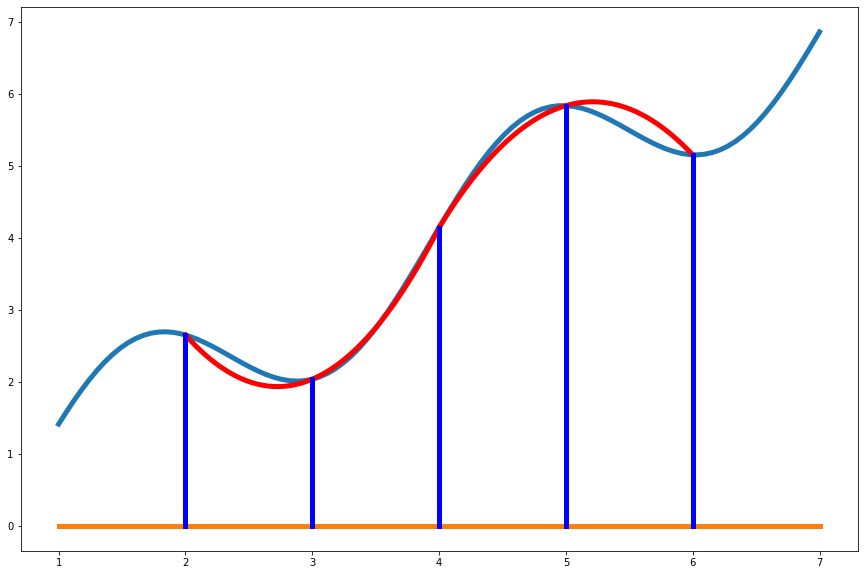

In [36]:
draw_simpsons(2,6,lambda x:x-np.cos(2*x),2)

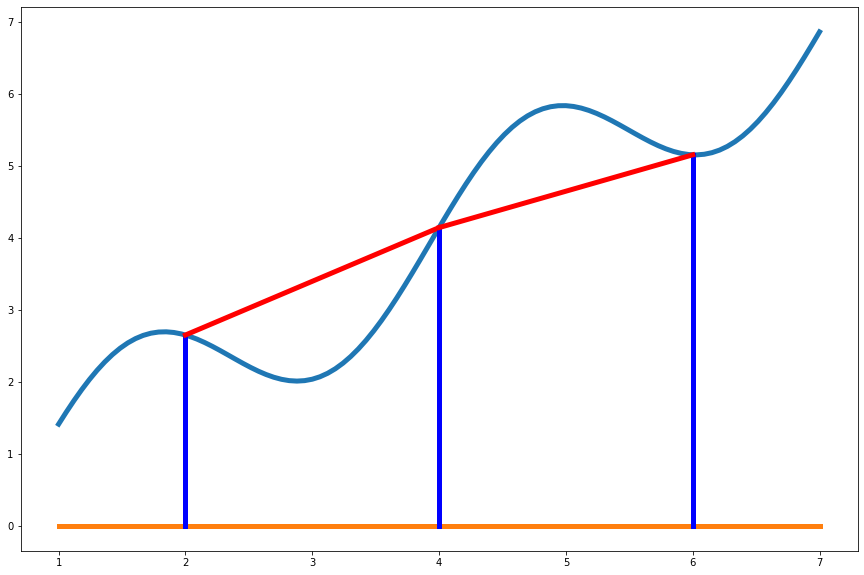

In [37]:
draw_trapezoids(2,6,lambda x:x-np.cos(2*x),2)

### Red greške Simpsonog 1/3 metoda.
#### Simpsonov 1/3 metod ima red greške:
#### $$O(h^4)$$
#### gde je $h$ veličina pod-intervala.
#### Kod Simpsonovog 1/3 metoda kada dupliramo broj primena, tj. $h$ podelimo sa 2, greška se smanji 16 puta:
#### $$greška(h)=h^4\\greška(\frac{h}{2})=(\frac{h}{2})^4=(\frac{1}{2})^4h^4=\frac{1}{16}h^4=\frac{1}{16}greška(h)\\greška(\frac{h}{2})=\frac{1}{16}greška(h)$$
#### Funkcija koju pozivamo u sledećem redu prikazuje grešku za broj primena metoda redom od $1$ do $2^5$ za $I=\int_{2}^{6}2^xdx$.

Text(0, 0.5, 'Greska')

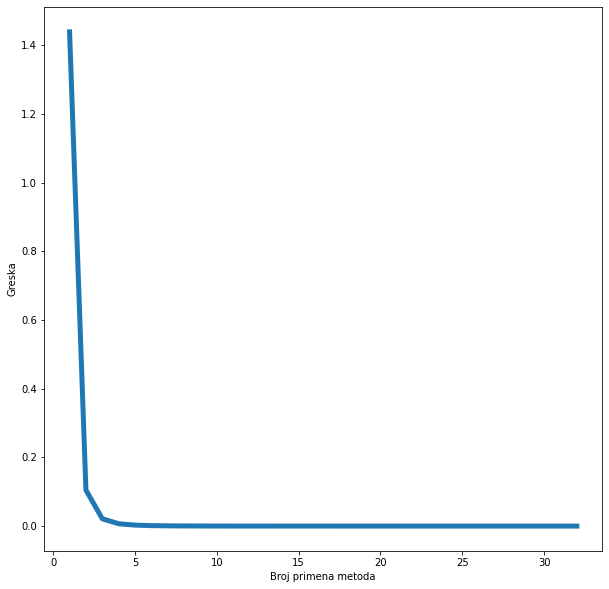

In [38]:
[errors,sub_intervals]=calculate_error(2,6,lambda x: 2**x,86.56170,2**5,simpson_kompozitno)
plt.figure(figsize=(10, 10))
plt.plot(range(1,2**5+1),errors,linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('Greska')

#### Prelazimo na lograritamsku skalu.

([<matplotlib.axis.XTick at 0x20bec44a780>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

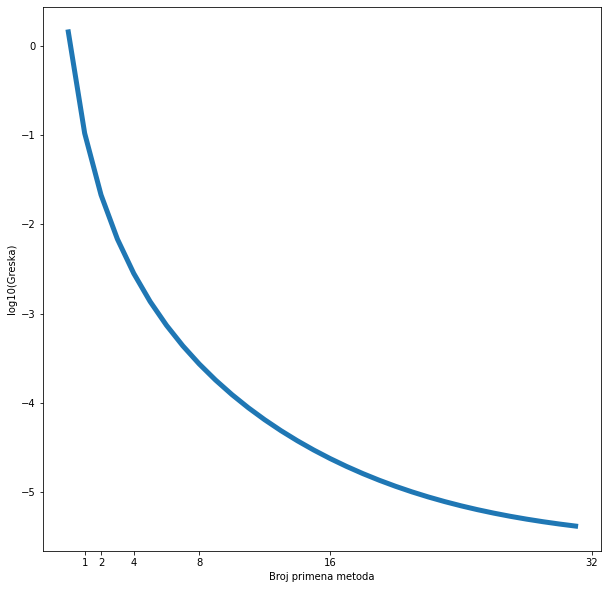

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(errors)),np.log10(errors),linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('log10(Greska)')

plt.xticks([2**i for i in range(6)])

#### Uporedićemo sada grafik greške (označeno plavom) fukcijom $f(h)=h^4$ gde je $h$ dužina pod-intervala (označeno crvenom).

Text(0, 0.5, 'log10(Greska)')

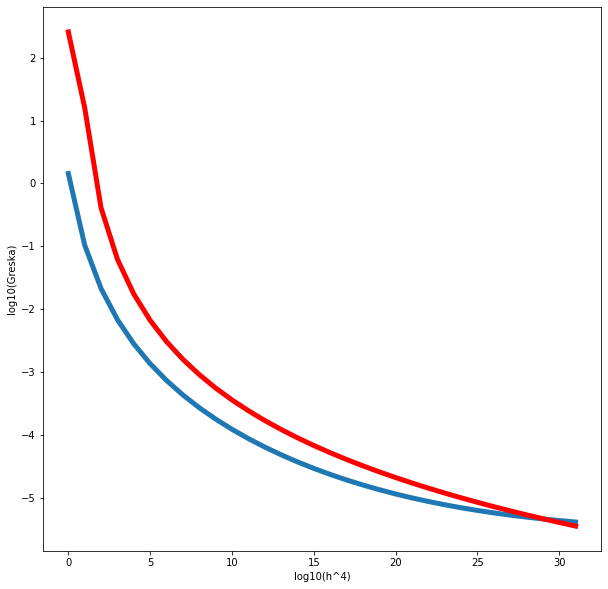

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(errors)),np.log10(errors),linewidth=5)

plt.plot(range(len(sub_intervals)),np.log10(sub_intervals**4),linewidth=5,color="red")
plt.xlabel('log10(h^4)')
plt.ylabel('log10(Greska)')

#### Vidimo da postoji jako veliko podudaranje grafika, iz čega se može zaključiti da odnos između greške i veličine pod-intervala na četvrti stepen stoji.
#### Upooredićemo grafike grešaka metode trapeza i Simpsonove 1/3 metode. Poređenje ćemo uraditi za integral funkcije
#### $$I=\int_{2}^{6}x-cos(2x)dx$$

([<matplotlib.axis.XTick at 0x20bec8acc50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

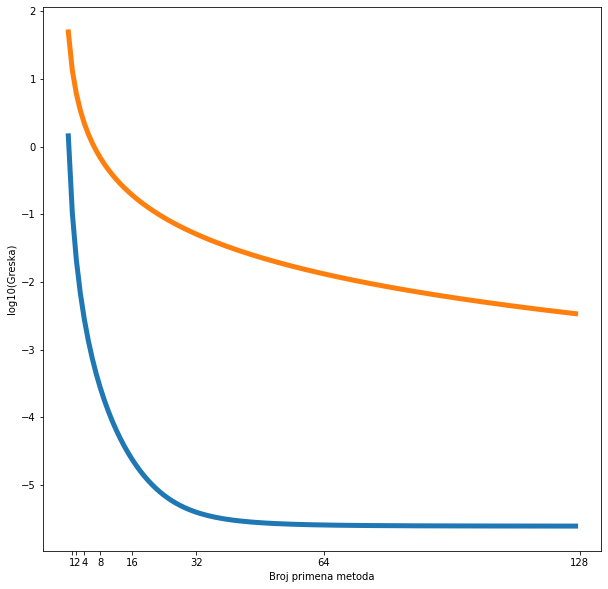

In [41]:
plt.figure(figsize=(10, 10))
[errors_simpson,sub_intervals_simp]=calculate_error(2,6,lambda x: 2**x,86.56170,2**7,simpson_kompozitno)
[errors_trapez,sub_intervals_tr]=calculate_error(2,6,lambda x: 2**x,86.56170,2**7,trapez_kompozitno)


plt.plot(range(len(errors_simpson)),np.log10(errors_simpson),linewidth=5)
plt.plot(range(len(errors_trapez)),np.log10(errors_trapez),linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('log10(Greska)')

plt.xticks([2**i for i in range(8)])

Text(0, 0.5, 'log10(h^2) i log10(h^4)')

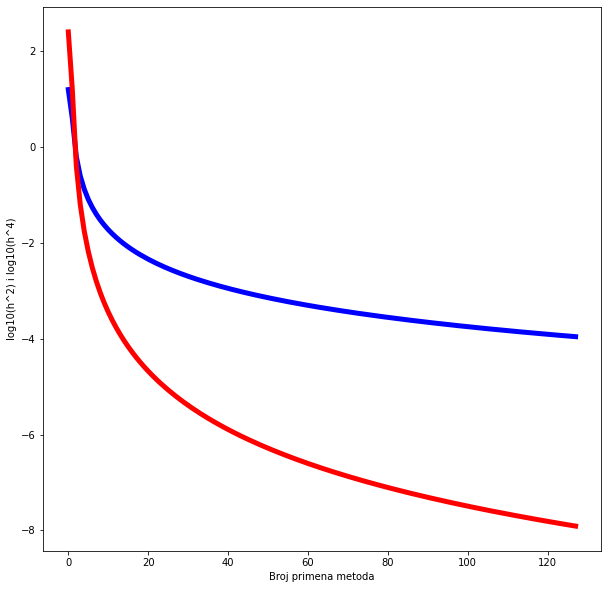

In [42]:
plt.figure(figsize=(10, 10))

plt.plot(range(len(sub_intervals_tr)),np.log10(sub_intervals_tr**2),linewidth=5,color="blue")

plt.plot(range(len(sub_intervals_simp)),np.log10(sub_intervals_simp**4),linewidth=5,color="red")
plt.xlabel('Broj primena metoda')
plt.ylabel('log10(h^2) i log10(h^4)')

#### Do sada smo videli da Njutn-Kotesove metode bolje rezultate mogu da postignu: (1) povećanjem kompleksnosti metode (stepena interpolacinog polinoma) ili (2) podelom intervala na veći broj pod-intervala.
#### Oba načina povećavaju računsku složenost numeričke integracije. U nastavku zato pokazujemo jednu od alternativa.

## Rombergov metod

#### Pre nego što objasnimo Rombergov metod pogledaćemo sledeći kod:

In [43]:
I_simpson_kom = simpson_kompozitno(2,6,lambda x: 2**x,1)
print(I_simpson_kom)

I_trapez_kom_1 = trapez_kompozitno(2,6,lambda x: 2**x,1)
I_trapez_kom_2 = trapez_kompozitno(2,6,lambda x: 2**x,2)

print(I_trapez_kom_1)
print(I_trapez_kom_2)

print((4*I_trapez_kom_2-I_trapez_kom_1)/3)

88.0
136.0
100.0
88.0


#### Vidimo da smo pomoću dve upotrebe metode trapeza (za 1 i 2 trapeza) dobili isti rezultat kao da smo upotrebili Smpsonova 1/3 metodu za ceo interval.
#### Dakle, dobili smo rezultat Smpsonove 1/3 bez da upošte znamo formulu ili implementaciju te metode. To je veoma značajan rezultat!
#### Sve što smo uradili je *(4*I_trapez_kom_2-I_trapez_kom_1)/3*. Postavlja se pitanje kako smo znali koje računske operacije da upotrebimo?
#### Upravo to je rezultat Rombergove metode. Ona nam pruža način da kombinujemo rezultate metoda manje kompleksnosti na takav način da dobijemo rezultate metoda veće kompleksnosti.
#### Objasnićemo sada na koji način smo došli do fromule za kombinovanje metoda manje kompleksnosti.
#### Recimo da imamo neki numerički metod za integraciju, npr. metod trapeza koji ćemo označiti sa $R_{1,1}$. Kod $R_{i,j}$ sa $i$ ozаčnavamo finoću podele, a sa $j$ kvalitet (kompleksnost metoda). Na primer, $R_{1,1}$ je jedna primena metode trapeza, $R_{2,1}$ su dve primene metode trapeza, a $R_{1,2}$ je jedna primena Simposonovog 1/3 metoda itd.
#### Dakle, dati numerički metod za integraciju $R_{1,1}$ se od tačne vrednosti integrala $I$ razlikuje za grešku $E_{1,1}$ koja je reda $O(h^2)$:
#### $$I=R_{1,1}+E_{1,1}$$
#### U ovom slučaju kada kažemo da je greška reda $O(h^2)$ mislimo na to da je najveći faktor greške (u odnosu na koga su svi ostali zanemarljivo mali) je proprocionalan (ponaša se slično kao) $h^2$.
#### Objasnićemo na šta se misli pomoću primera Tejlorovog reda:
#### $$f(x)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+O(h^3)$$, gde je $h=x-x_0$. 
#### Iz definicije Tejlorovog reda znamo da sa $O(h^3)$ nismo označili samo jedan element koji je preostao u redu nego da se za jako male vrednosti $h$ sve što je preostalo ponaša kao $h^3$, tj. da je taj sa sabirak uz $h^3$ najveći faktor greške ako koristimo samo prva tri člana reda da aproksimiramo funkciju u okolini tačke $x_0$. To znači da greška ima sledeći oblik:
#### $$f(x)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+Ah^3+Bh^4+Ch^5+...$$
#### , gde su $A$,$B$,$C$ neke konstante, a mi mi zanemarujemo delove $+Bh^4+Ch^5+...$ i posmatramo samo najveći faktor $Ah^3$.
#### Kod Njutn-Kotesovih formula imamo istu situaciju samo su stepeni faktora greške uvek parni (za detalje pogledati udžbenik). Na primer, za metod trapeza važi:
#### $$I=R_{1,1}+Ah^2+Bh^4+Ch^6+...$$, a za Simpsonov 1/3 metod važi:
#### $$I=R_{1,2}+Ah^4+Bh^6+...$$ ($A$,$B$,$C$... su konstante i nisu iste u slučaju metoda trapeza i Simpsonovog 1/3 metoda).
#### Pokazujemo sada na koji način se izvodi formula za Rombergov metod.
#### Uzimamo dve primene metode trapeza, za ceo veličinu pod-intervala $h$, $\frac{1}{2}h$. Označićemo ih sa $R_{1,1}$ i $R_{2,1}$, a njihove najveće faktore grešaka (sabirak sa $h^2$) sa  $E_{1,1}$ i $E_{2,1}$.
#### U nastavku pokušavamo nekako da iskombinujemo $R_{1,1}$ i $R_{2,1}$ tako da uklonimo $E_{1,1}$ i $E_{2,1}$.
#### Ključna stvar koja će nam to omogućiti je to što znamo da važi da je:
#### $$E_{2,1}=\frac{1}{4}E_{1,1}$$
#### Ranije smo pokazali kada prepolovimo veličinu pod-intervala, greška metode trapeza se smanji 4 puta.
#### Posmatrajmo sada sledeće izvođenje:

#### $$I=R_{1,1}+E_{1,1}$$
#### $$I=R_{2,1}+E_{2,1}$$
#### $$E_{2,1}=\frac{1}{4}E_{1,1}$$
#### $$I=R_{1,1}+E_{1,1}$$
#### $$I=R_{2,1}+\frac{1}{4}E_{1,1}$$
#### $$R_{1,1}-R_{2,1}=-\frac{3}{4}E_{1,1}$$
#### $$E_{1,1}=\frac{4(R_{2,1}-R_{1,1})}{3}$$
#### $$I=R_{1,1}+E_{1,1}=R_{1,1}+\frac{4(R_{2,1}-R_{1,1})}{3}$$
#### $$I=\frac{4R_{2,1}-R_{1,1}}{3}$$

#### Vidimo da smo uspeli da uklonimo $E_{1,1}$ i $E_{2,1}$. Da li smo time uklonili svu grešku?
#### Nismo, ukloni smo samo najveći faktor. Prvi sledeći faktor je reda $O(h^4)$, odnosno rezultat koji smo dobili je u stvari rezultat Simpsonovog 1/3 metoda.
#### Implementiraćemo sada funkciju koja je primenti formulu koju smo upravo izveli.

In [44]:
def romberg(a,b,fun,n):
    A=np.zeros([n,n])
    for i in range(n):
        A[i,0]=trapez_kompozitno(a,b,fun,2**i)
    
    print(A)
    
    for j in range(1,n):
        for i in range(n-j):
            A[i,j]=(4 * A[i+1,j-1] - A[i,j-1]) / 3
            
    print(A)

In [45]:
romberg(2,6,lambda x: 2**x,3)

[[136.   0.   0.]
 [100.   0.   0.]
 [ 90.   0.   0.]]
[[136.          88.          86.22222222]
 [100.          86.66666667   0.        ]
 [ 90.           0.           0.        ]]


#### Posmatramo samo rezultate druge kolone prethodno odštampane matrice. Na ostale kolone fokusiramo se u nastavku.

In [46]:
I_simpson_kom = simpson_kompozitno(2,6,lambda x: 2**x,2)

print(I_simpson_kom)

86.66666666666666


#### Šta bi se dogodilo kada bi smo u prethodnom izvođenju koristili Simpsonov 1/3 metod umesto metoda trapeza:
#### $$I=R_{1,2}+E_{1,2}$$
#### $$I=R_{2,2}+E_{2,2}$$
#### $$E_{2,2}=\frac{1}{16}E_{1,2}$$
#### $$R_{1,2}-R_{2,2}=-\frac{15}{16}E_{1,2}$$
#### $$E_{1,2}=\frac{16(R_{2,2}-R_{1,2})}{15}$$
#### $$I=R_{1,2}+E_{1,2}=R_{1,2}+\frac{16(R_{2,2}-R_{1,2})}{15}$$
#### $$I=\frac{16R_{2,2}-R_{1,2}}{15}$$
#### Dakle, ako sa u $R_{i,j}$ sa $i$ ozаčnimo finoću podele, a sa $j$ kvalitet (kompleksnost metoda) vidimo da je šablon za Rombergov da se $R_{i+1,j}$ množi sa $4^j$, a deli se sa $4^j-1$, odnosno:
#### $$R_{i,j+1}=\frac{4^jR_{i+1,j}-R_{i,j}}{4^j-1}$$
#### Implementiramo sada šablon koji smo izveli. Funkcija koju dobijamo proizvoljan broj puta primenjuje formulu iz prethodnog reda. Tačnost do koje hoćemo da idemo unosi se kao broj kolona matrice, odnosno $n$.
#### Najbolji rezultat koji imamo je poslednji element prve vrste, pa njega vraćamo.

In [47]:
def romberg(a,b,fun,n):
    A=np.zeros([n,n])
    for i in range(n):
        A[i,0]=trapez_kompozitno(a,b,fun,2**i)
    
    for j in range(1,n):
        for i in range(n-j):
            A[i,j]=(4**j * A[i+1,j-1] - A[i,j-1]) / (4**j - 1)
    
    print(A)
    return A[0,n-1]

In [71]:
I_romberg=romberg(2,6,lambda x: 2**x,3)

print(I_romberg)

[[136.          88.          86.57777778]
 [100.          86.66666667   0.        ]
 [ 90.           0.           0.        ]]
86.57777777777778


In [72]:
tacno_resenje = 86.56170

print(tacno_resenje)

print(I_romberg)

86.5617
86.57777777777778


#### Vidimo da smo uspeli da dobijemo približno tačno rešenje iako smo od metoda za numeričku integraciju koristili samo metod trapeza i to za $2^2=4$ primene.

In [75]:
I_romberg=romberg(2,6,lambda x: 2**x,4)

print(I_romberg)
print(tacno_resenje)

[[136.          88.          86.57777778  86.56175046]
 [100.          86.66666667  86.56200088   0.        ]
 [ 90.          86.56854249   0.           0.        ]
 [ 87.42640687   0.           0.           0.        ]]
86.56175045658057
86.5617


#### Vidimo da smo, za $2^3=8$ primena, uspeli da dobijemo rešenje za koje je greška manja od $10^{-4}$.


#### Pogledaćemo sada koliko bi nam otrpilike trebalo primena metode trapeza da bi dobili rešenje za koje važi da je greška manja od $10^{-4}$.

([<matplotlib.axis.XTick at 0x20bec817cc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

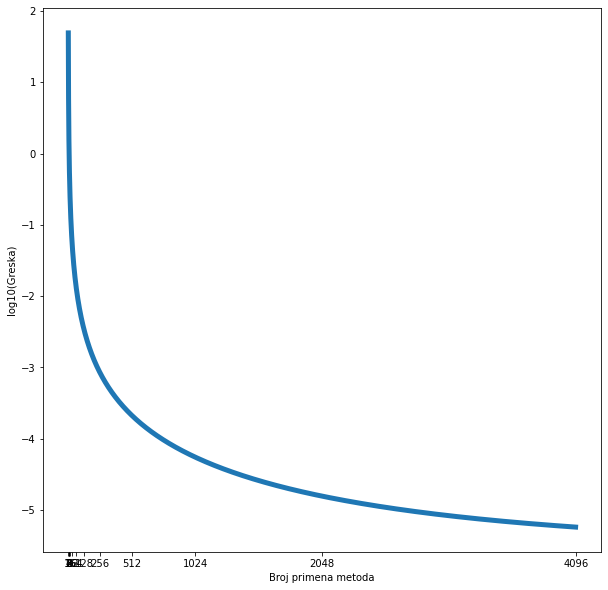

In [50]:
[errors,sub_intervals]=calculate_error(2,6,lambda x: 2**x,86.56170,2**12,trapez_kompozitno)

plt.figure(figsize=(10, 10))
plt.plot(range(len(errors)),np.log10(errors),linewidth=5)
plt.xlabel('Broj primena metoda')
plt.ylabel('log10(Greska)')

plt.xticks([2**i for i in range(13)])

In [77]:
I_trapez_kom=trapez_kompozitno(2,6,lambda x: 2**x,2**10)

print(I_trapez_kom)

86.56175533626447


In [78]:
print(np.abs(tacno_resenje-I_trapez_kom)<=10**-4)

True


#### Dakle bez Rombergove metode trebalo bi negde oko $2^{10}$ primena metoda trapeza da dobijemo veoma tačno rešenje (greška je manja od $10^{-4}$), što možemo da vidimo na grafiku iznad.
#### Takođe sa Rombergovom metodom sa 8 primena metode trapeza postigli smo rezultat metode koja ima tačnost reda $O(h^{8})$ bez poznavanja formule ili implementacije metode tako velikog reda tačnosti.

## Gausova kvdaratura
#### Recimo da izračunavamo integral fukcije ispod na intervalu [-1,1].

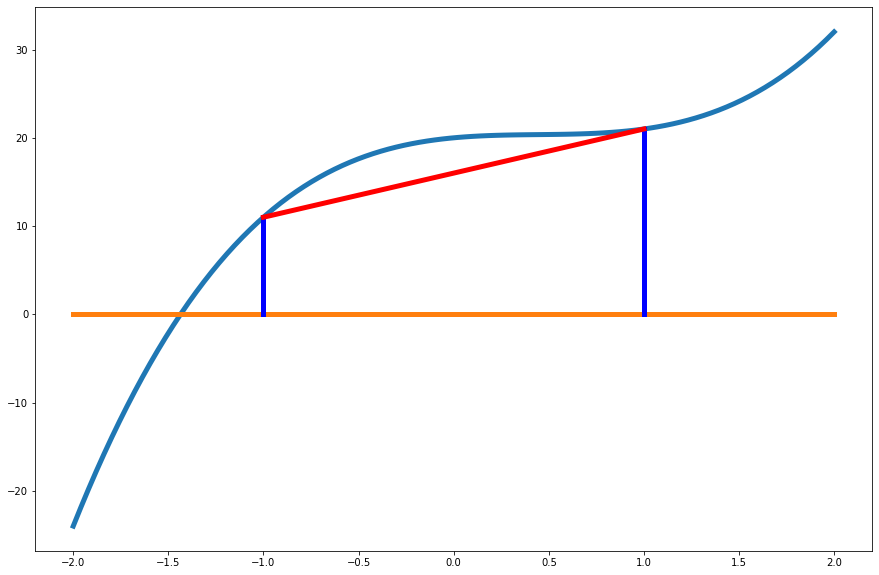

In [53]:
fun=lambda x: 3 * x**3 - 4 * x**2 + 2 * x + 20
draw_trapezoids(-1,1,fun,1)

#### Koristimo jednu primenu metode trapeza:

In [54]:
I_trapez_1=trapez_kompozitno(-1,1,fun,1)

print(I_trapez_1)

a=-1
b=1

I_trapez_1_rucno=(b-a)/2*fun(a)+(b-a)/2*fun(b)

print(I_trapez_1_rucno)

32.0
32.0


#### Metoda trapeza uvek koristi krajnje tačke $(a,f(a))$ i $(b,f(b))$ i množi ih vrednošću $(b-a)/2$.
#### Šta bi bilo ako bi odabrali neke druge tačke i pomnožili ih nekom drugom vrednošću?

In [55]:
x1=-0.577350269
x2=0.577350269

c1=1
c2=1;

I_gq= c1* fun(x1) + c2 * fun(x2)

print(I_gq)

37.33333333508502


In [79]:
tacno_resenje=112/3 #određeno analitički

print(tacno_resenje)

37.333333333333336


#### Na koji način smo znali koje tačke i koje koeficijente da upotrebimo da upotrebimo da bi dobili tačno rešenje?
#### To je rezultat Gausove kvadrature.
#### Cilj Gausove kvadarature je da postigne veći nivo tačnosti bez povećanja kompleksnosti metode.
#### Drugim rečima, hoćemo da uzmemo vrednosti funkcije u dve tačke $x_1$ i $x_2$ i da ih pomnožimo sa neka dva koeficijenta $c_1$ i $c_2$, ali tako da dobijemo veću tačnost od metode trapeza. 
#### Kod metode trapeza je $x_1=a$, $x_2=b$, $c_1=\frac{b-a}{2}$ i $c_2=\frac{b-a}{2}$.
### Postupak određivanja tačaka i koeficijenata
#### Pošto imamo 4 nepoznate koje treba da odredimo ($x_1,x_2,c_1,c_2$) trebalo bi na neki način da smislimo 4 uslova (jednačine) koje ti koeficijenti treba da zadovolje.
#### Zahtevaćemo da te 4 vrednosti budu takve da linearna kombinacija:
#### $$c_1f(x_1)+c_2f(x_2)$$
#### ima isti rezultat kao analitičko rešenje integrala bilo kog polinoma trećeg stepena na intervalu $[a,b]$ gde su $x_1$ i $x_2$ tačke iz tog intervala. Dakle, želimo da postignemo da za blio koji polinom:
#### $$f(x)=a_1x^3+a_2x^2+a_3x+a_4$$ važi:
#### $$\int_{a}^{b}(a_1x^3+a_2x^2+a_3x+a_4)dx=c_1f(x_1)+c_2f(x_2)$$
#### $$c_1f(x_1)+c_2f(x_2)=c_1(a_1x_1^3+a_2x_1^2+a_3x_1+a_4)+c_2(a_1x_2^3+a_2x_2^2+a_3x_2+a_4)=\\a_1(c_1x_1^3+c_2x_2^3)+a_2(c_1x_1^2+c_2x_2^2)+a_3(c_1x_1+c_2x_2)+a_4(c_1+c_2)$$
#### $$\int_{a}^{b}(a_1x^3+a_2x^2+a_3x+a_4)dx=a_1\frac{b^4-a^4}{4}+a_2\frac{b^3-a^3}{3}+a_3\frac{b^2-a^2}{2}+a_4(b-a)$$
#### $$a_1\frac{b^4-a^4}{4}+a_2\frac{b^3-a^3}{3}+a_3\frac{b^2-a^2}{2}+a_4(b-a)=\\a_1(c_1x_1^3+c_2x_2^3)+a_2(c_1x_1^2+c_2x_2^2)+a_3(c_1x_1+c_2x_2)+a_4(c_1+c_2)$$
#### Dobijamo sledeći sistem nelinearanih jednačina:
#### $$c_1x_1^3+c_2x_2^3=\frac{b^4-a^4}{4} \hspace{20 mm} c_1x_1^2+c_2x_2^2=\frac{b^3-a^3}{3}\\c_1x_1+c_2x_2=\frac{b^2-a^2}{2} \hspace{20 mm} c_1+c_2=b-a$$
#### Sistem ima analitičko rešenje oblika:
#### $$x_1=\frac{b-a}{2}(-\frac{1}{\sqrt{3}})+\frac{a+b}{2} \hspace{20 mm} x_2=\frac{b-a}{2}(\frac{1}{\sqrt{3}})+\frac{a+b}{2}$$
#### $$c_1=\frac{b-a}{2} \hspace{20 mm} c_2=\frac{b-a}{2}$$
#### Gausova kvadratura se tipično koristi na sledeći način.
#### 1.Imamo unapred izračunate vrednosti tačaka i koeficijenata za interval $[-1,1]$ koje se mogu pronaći u literturi ili na internetu.
#### 2.Integral koji rešavamo na intervalu $[a,b]$ svodimo na $[-1,1]$ uvođenjem linearnog mapiranja (koje pokazujemo u nastavku).
#### 3.Koristimo tačake i koeficijenate za interval $[-1,1]$ da rešimo integral.
#### Konkretno za dve tačke, vrednosti tačaka i koeficijenata za interval $[-1,1]$ su:
#### $$x_1=-0.577350269 \hspace{20 mm} x_2=0.577350269 \hspace{20 mm}\\c_1=1 \hspace{20 mm} c_2=1$$
#### Kao malu vežbu, možemo ih dobiti kao rešenje sledećeg sistema:
#### $$c_1x_1^3+c_2x_2^3=0 \hspace{20 mm} c_1x_1^2+c_2x_2^2=\frac{2}{3}\\c_1x_1+c_2x_2=0 \hspace{20 mm} c_1+c_2=2$$

In [57]:
from scipy.optimize import fsolve

def f(x):                                   #x[0] je x1, x[1] je x2, x[2] je c1, x[3] je c2
    return [x[2]*x[0]**3+x[3]*x[1]**3,
            x[2]*x[0]**2+x[3]*x[1]**2 - 2./3.,
            x[2]*x[0]   +x[3]*x[1],
            x[2]        +x[3]-2]


resenje = fsolve (f, [-0.5,0.5,1.1,1.1])

print(resenje)

[-0.57735027  0.57735027  1.          1.        ]


#### Kao primer upotrebe gausove kvadrature prvo rešavamo integral funkcije:
#### $$I=\int_{-1}^{1}2^xdx$$

In [58]:
tacno_resenje=3/(2*np.log(2))

print(tacno_resenje)

2.1640425613334453


In [59]:
fun=lambda x: 2**x
x1=-0.577350269
x2=0.577350269
c1=1.
c2=1.
I_gq=c1*2**x1+c2*2**x2

print(I_gq)

2.162299809266768


In [60]:
I_trapez_1=trapez_kompozitno(-1,1,lambda x: 2**x,1)

print(I_trapez_1)

2.5


#### Sada koristimo istu podintegralnu funkciju, ali menjamo interval:
#### $$I=\int_{2}^{6}2^xdx$$
#### To znači da sada moramo $x$ koji je intervalu $[2,6]$ da prebacimo na neko $t$ koje će biti u intervalu $[-1,1]$.
#### Pokazaćemo kako možemo da mapiramo proizvoljan interval $[a,b]$ na interval $[-1,1]$. Mapiranje radimo pomoću prave koja prolazi kroz tačke $(-1,a), (1,b)$.
#### Formiramo pravu, tj. Lagranžov interpolacioni polinom za $(-1,a), (1,b)$. 
#### Uvodimo promenjljivu $t$ koja je u intervalu $[-1,1]$. 
#### Pomoću Lagranžovog polinoma određujemo koju smenu treba da uvedemo za $x$ iz intervala $[a,b]$ tako da umesto $x$ integralimo po $t$ iz $[-1,1]$.
#### $$x=a\frac{t-1}{-1-1}+b\frac{t-(-1)}{1-(-1)}=\frac{t-1}{-2}a+\frac{t+1}{2}b=\frac{b-a}{2}t+\frac{a+b}{2}$$
#### $$x=\frac{b-a}{2}t+\frac{a+b}{2}$$
#### Ako upotrebimo prethodnu smenu za $x$ u integralu:
#### $$I=\int_{a}^{b}f(x)dx$$
#### onda podintegralna funkcija ima novu nezavisnu promenljivu $t$ koja je u rasponu $[-1,1]$.
#### Moramo da zamenimo $dx$ pa računamo izvod naše smene:
#### $$ x=\frac{b-a}{2}t+\frac{a+b}{2} \implies dx=\frac{b-a}{2}dt$$
#### Uvodimo sada smenu u integral:
#### $$I=\int_{a}^{b}f(x)dx=\int_{-1}^{1}f(\frac{b-a}{2}t+\frac{a+b}{2})\frac{b-a}{2}dt$$
#### U kodu ispod testiramo i crtamo smenu za $(-1,2), (1,6)$:

In [82]:
p=linterp([-1,1], [2,6])

print(p)

[2. 4.]


In [86]:
a=2.
b=6.
print((b-a)/2.)
print((a+b)/2.)

2.0
4.0


In [84]:
print(np.polyval(p,-1))
print(np.polyval(p,1))

2.0
6.0


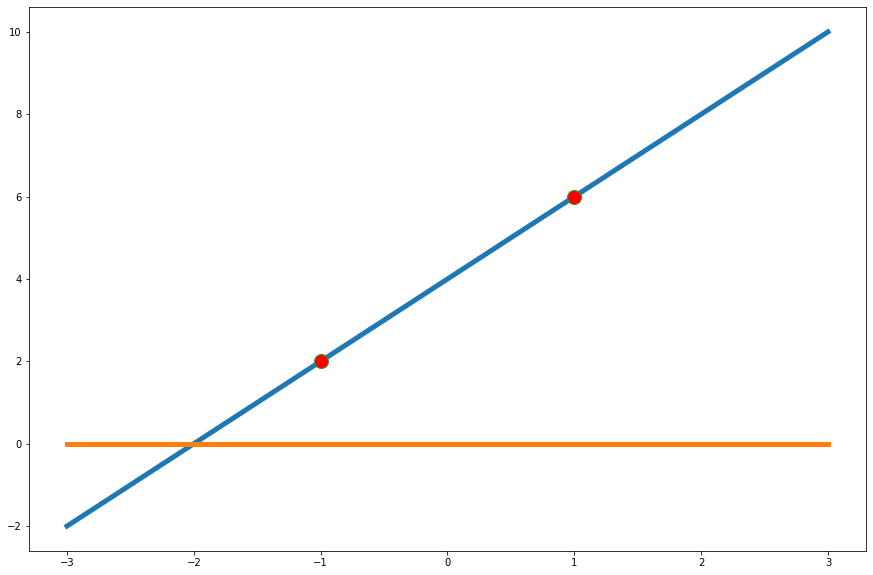

In [63]:
plot_function([-2,2],lambda x: 2*x + 4)
plt.plot([-1,1], [2,6],'o',markersize=14, markerfacecolor='r')

#### Rešavamo sada sledeći integral pomoću Gausove kvadrature:
#### $$I=\int_{2}^{6}2^xdx$$
#### $$I=\int_{2}^{6}2^xdx=\int_{-1}^{1}2^{\frac{6-2}{2}t+\frac{6+2}{2}}\frac{6-2}{2}dt=\int_{-1}^{1}2^{2t+4}2dt=\int_{-1}^{1}2^{2t+5}dt$$
#### Sada korisimo:
#### $$f(t)=2^{2t+5} \hspace{20 mm} t_1=-0.577350269 \hspace{20 mm} t_2=0.577350269 \hspace{20 mm} \hspace{20 mm} c_1=1 \hspace{20 mm} c_2=1$$ 
#### i izračunavamo:
#### $$I=c_1f(t_1)+c_2f(t_2)=2^{2 \cdot -0.577350269+5}+2^{2 \cdot 0.577350269+5}$$

In [64]:
I_gq=2**(2*-0.577350269+5)+2**(2*0.577350269+5)

print(I_gq)

85.61729488496321


In [65]:
I_trapez_1=trapez_kompozitno(2,6,lambda x: 2**x,1)

print(I_trapez_1)

136.0


In [66]:
tacno_resenje = 86.56170

print(tacno_resenje)

86.5617


In [67]:
greska_gq=abs(I_gq-tacno_resenje)/tacno_resenje

print(greska_gq)

greska_I_trapez_1=abs(I_trapez_1-tacno_resenje)/tacno_resenje

print(greska_I_trapez_1)

0.010910196022453198
0.5711336537983889


#### Iz rezultata se vidi da Gausova kvadratura za dve tačke ima značajno manju grešku od metode trapeza.
#### U nastavku dat je kod za Gausovu kvadraturu za dve tačke za proizvoljan interval $[a,b]$.

In [68]:
def gauss_quad(a,b,fun,n):
    x=np.array([-0.577350269,0.577350269]) #koristimo np.array zato što nam je kasnije potrebno množenje vektora u liniji: (b-a)/2.0 * x + (a+b)/2.0
    c=np.array([1.,1.])
    
    map_fun=(b-a)/2.0 * x + (a+b)/2.0
    map_dx=(b-a)/2.0
    
    I=sum(c*fun(map_fun)*map_dx)
    
    return I

In [69]:
I_gauss_quad_1=gauss_quad(2,6,lambda x: 2**x,2)

print(I_gauss_quad_1)

85.61729488496321


In [70]:
I_trapez_1=trapez_kompozitno(2,6,lambda x: 2**x,1)

print(I_trapez_1)

136.0


#### Za kraj samo napomena da se Gausova kvadratura može koristiti i za veći broj tačka od dve. Tačke i koeficijenti se izvode tako da njihova linearna kombinacija daje tačan rezultat za integrale: petog, sedmog, devetog... stepena.
#### Kao i u slučaju dve tačke, u literaturi i na internetu dosupne su tabele sa vrednostima i sve što je potrebno je uvesti smenu koja će prebaci intregal na interval $[-1,1]$.